<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/An%C3%A1lisis_descriptivo_en_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', 500)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/datasets/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2




A. Análisis exploratorio de datos

    A.1 Identificación de variables y tipos de datos.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

B. Datos del análisis

B.1 ¿Existe alguna relación entre para quién trabaja una persona y su puntuación de rendimiento?

In [7]:
data.groupby(['ManagerName','PerformanceScore']).size().reset_index()

,ManagerName,PerformanceScore,0
0,Alex Sweetwater,Exceeds,2
1,Alex Sweetwater,Fully Meets,6
2,Alex Sweetwater,Needs Improvement,1
3,Amy Dunn,Exceeds,3
4,Amy Dunn,Fully Meets,15
5,Amy Dunn,Needs Improvement,1
6,Amy Dunn,PIP,2
7,Board of Directors,Fully Meets,2
8,Brandon R. LeBlanc,Fully Meets,7
9,Brannon Miller,Exceeds,7


In [6]:
grouped_data = data.groupby(['ManagerName','PerformanceScore']).size().reset_index()
grouped_data.columns = ['ManagerName','PerformanceScore','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'ManagerName', y = 'Count', color='PerformanceScore', title = 'Performance Score of Employee & The Managers')
fig.show()

Resumen del gráfico:

    - Más del 50% de los empleados de cada director cumple con la puntuación de rendimiento.
    - Sólo 3 de los 21 empleados de la dirección han alcanzado el nivel de rendimiento deseado.
    - Más de 14 empleados de los directores han superado la puntuación de rendimiento, siendo el empleado de    Brannon el que más la ha superado.
    - 7 de 21 gerentes tienen PIP para sus empleados.
    - Michael Albert tiene el mayor número de puntuaciones de "Necesita mejorar" sobre otros 12 empleados de la dirección.

### B.2 ¿Cuál es el perfil de diversidad global de la organización?

En esta sección, para medir la diversidad global, comprobaría en base a Sexo, Ciudadanía, Raza hacia toda la organización, cruzando departamentos y puestos

Ps: Todavía no he calculado el parámetro de la diversidad, ¿hay algún tipo de número específico de cada uno de los factores de diversidad que la organización debe cumplir para lograr la diversidad?
* Diversidad de toda la organización

Basada en el sexo, la ciudadanía, la raza


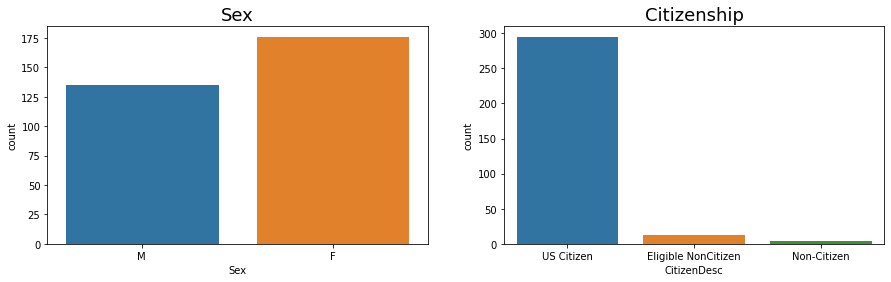

In [8]:
plt.figure(figsize=(15,4))

plt.subplot(121)
plt.title('Sex', fontsize=18)
sns.countplot(x = 'Sex', data = data)

plt.subplot(122)
plt.title('Citizenship', fontsize=18)
sns.countplot(x="CitizenDesc", data = data)




plt.show()

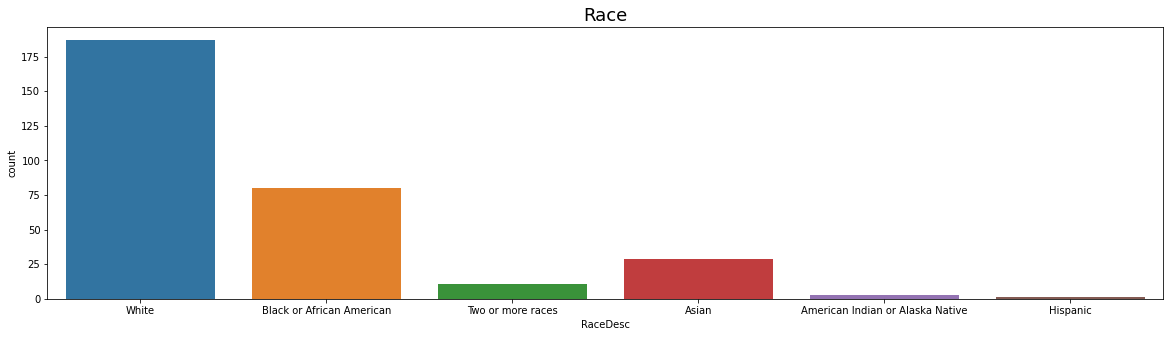

In [9]:
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.title('Race', fontsize=18)
sns.countplot(x="RaceDesc", data = data)

Resumen

Diversidad para toda la organización

    - Sexo: Las mujeres son el mayor número de empleados que los hombres.
    - Ciudadanía: Hay 3 ciudadanías que siguen en orden de mayor a menor número de estatus de ciudadanía: estadounidense, no ciudadano elegible y no ciudadano.
    - Raza: Hay 6 razas que siguen en orden de mayor a menor número de razas: blanca, negra o afroamericana, asiática, dos o más razas, india americana o nativa de Alaska, hispana.




* Diversidad cruzada Departamento

Basada en el sexo, la ciudadanía y la raza


In [10]:
data.groupby(['Sex','Department']).size().reset_index()

,Sex,Department,0
0,F,Admin Offices,6
1,F,Executive Office,1
2,F,IT/IS,22
3,F,Production,126
4,F,Sales,15
5,F,Software Engineering,6
6,M,Admin Offices,3
7,M,IT/IS,28
8,M,Production,83
9,M,Sales,16


In [11]:
grouped_data = data.groupby(['Sex','Department']).size().reset_index()
grouped_data.columns = ['Sex','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='Sex', title = 'Numbers of Sex accross Department')
fig.show()

In [13]:
data.groupby(['CitizenDesc','Department']).size().reset_index()

,CitizenDesc,Department,0
0,Eligible NonCitizen,IT/IS,2
1,Eligible NonCitizen,Production,7
2,Eligible NonCitizen,Sales,2
3,Eligible NonCitizen,Software Engineering,1
4,Non-Citizen,Production,3
5,Non-Citizen,Software Engineering,1
6,US Citizen,Admin Offices,9
7,US Citizen,Executive Office,1
8,US Citizen,IT/IS,48
9,US Citizen,Production,199


In [14]:
#Race/Nationality/Citizenship
grouped_data = data.groupby(['CitizenDesc','Department']).size().reset_index()
grouped_data.columns = ['CitizenDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='CitizenDesc', title = 'Citizenship of Empoyee accross Department')
fig.show()

In [15]:
data.groupby(['RaceDesc','Department']).size().reset_index()

,RaceDesc,Department,0
0,American Indian or Alaska Native,Production,2
1,American Indian or Alaska Native,Sales,1
2,Asian,IT/IS,6
3,Asian,Production,21
4,Asian,Sales,1
5,Asian,Software Engineering,1
6,Black or African American,Admin Offices,5
7,Black or African American,IT/IS,15
8,Black or African American,Production,45
9,Black or African American,Sales,10


In [16]:
#Race/Nationality/Citizenship
grouped_data = data.groupby(['RaceDesc','Department']).size().reset_index()
grouped_data.columns = ['RaceDesc','Department','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Department', y = 'Count', color='RaceDesc', title = 'Race of Employee accross Department')
fig.show()



Resumen

Diversidad en los departamentos

    - Sexo: Todos los departamentos cuentan con empleadas, incluida la Oficina Ejecutiva, en la que no hay ningún hombre.
    - Ciudadanía: La mayoría de los ciudadanos estadounidenses trabajan en todos los departamentos, los no ciudadanos elegibles tienen un lugar en Producción, TI, Ventas e Ingeniería de Software, y los no ciudadanos trabajan principalmente en Producción e Ingeniería de Software.
    -Raza :
        Los empleados blancos tienen su puesto en todo el departamento,
        Los empleados negros o afroamericanos tienen su lugar en casi todos los departamentos, excepto en la Oficina Ejecutiva.
        Los empleados asiáticos tienen la misma distribución que los negros o afroamericanos, excepto en la Oficina Administrativa.
        Por otra parte, los hispanos tienen su lugar de trabajo en Producción.
        Los indios americanos o nativos de Alaska trabajan en Producción y Ventas al igual que los empleados de otras dos razas.




* Diversidad a través de la posición

Basada en el sexo, la ciudadanía y la raza


In [18]:
data.groupby(['Sex','Position']).size().reset_index()

,Sex,Position,0
0,F,Accountant I,1
1,F,Administrative Assistant,3
2,F,Area Sales Manager,12
3,F,BI Developer,1
4,F,CIO,1
5,F,Data Analyst,3
6,F,Data Architect,1
7,F,Database Administrator,4
8,F,Director of Sales,1
9,F,IT Support,5


In [19]:
grouped_data = data.groupby(['Sex','Position']).size().reset_index()
grouped_data.columns = ['Sex','Position','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Position', y = 'Count', color='Sex', title = 'Numbers of Sex of Employee accross Position')
fig.show()

In [20]:
data.groupby(['RaceDesc','Position']).size().reset_index()

,RaceDesc,Position,0
0,American Indian or Alaska Native,Area Sales Manager,1
1,American Indian or Alaska Native,Production Technician II,2
2,Asian,Area Sales Manager,1
3,Asian,Database Administrator,1
4,Asian,Production Manager,2
5,Asian,Production Technician I,15
6,Asian,Production Technician II,4
7,Asian,Senior BI Developer,3
8,Asian,Software Engineer,1
9,Asian,Sr. Network Engineer,2


In [21]:
grouped_data = data.groupby(['RaceDesc','Position']).size().reset_index()
grouped_data.columns = ['RaceDesc','Position','Count']
grouped_data = grouped_data.sort_values('Count', ascending = False)
fig = px.bar(grouped_data, x = 'Position', y = 'Count', color='RaceDesc', title = 'Race of Employee accross Position')
fig.show()


Resumen

Diversidad en los puestos (son 32 puestos)

    - Sexo : La mayoría de los puestos de dirección en el área técnica están ocupados por hombres, mientras que el presidente y el director general y el director de ventas están a cargo de mujeres.
    - Raza :
        Los empleados blancos trabajan en 24 de los 32 puestos,
        Los negros o afroamericanos tienen 22,
        Los empleados asiáticos trabajan principalmente en el área técnica, con 8 puestos del total.
        Además, los hispanos trabajan como directores de producción.
        Los indios americanos o nativos de Alaska trabajan como técnicos de producción y directores de ventas.
        Los empleados de otras dos razas trabajan en 3 puestos: técnico de producción y jefe de ventas.




2.C ¿Cuáles son nuestras mejores fuentes de reclutamiento si queremos garantizar una organización diversa?


In [23]:
data.groupby(['RecruitmentSource']).size().reset_index()

,RecruitmentSource,0
0,CareerBuilder,23
1,Diversity Job Fair,29
2,Employee Referral,31
3,Google Search,49
4,Indeed,87
5,LinkedIn,76
6,On-line Web application,1
7,Other,2
8,Website,13


In [22]:
m = data.groupby(['RecruitmentSource']).size().reset_index()
m.columns = ['RecruitmentSource','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values='Distributions', names='RecruitmentSource')
fig.show()

In [24]:
data.groupby(['RecruitmentSource', 'Sex']).size().reset_index()

,RecruitmentSource,Sex,0
0,CareerBuilder,F,16
1,CareerBuilder,M,7
2,Diversity Job Fair,F,15
3,Diversity Job Fair,M,14
4,Employee Referral,F,11
5,Employee Referral,M,20
6,Google Search,F,33
7,Google Search,M,16
8,Indeed,F,50
9,Indeed,M,37


In [25]:
m = data.groupby(['RecruitmentSource', 'Sex']).size().reset_index()
m.columns = ['RecruitmentSource','Sex','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x='RecruitmentSource', y='Distributions', color='Sex')
fig.show()

In [26]:
data.groupby(['RecruitmentSource', 'RaceDesc']).size().reset_index()

,RecruitmentSource,RaceDesc,0
0,CareerBuilder,Asian,2
1,CareerBuilder,Black or African American,5
2,CareerBuilder,White,16
3,Diversity Job Fair,Black or African American,29
4,Employee Referral,Asian,1
5,Employee Referral,Black or African American,5
6,Employee Referral,White,25
7,Google Search,American Indian or Alaska Native,1
8,Google Search,Asian,7
9,Google Search,Black or African American,4


In [27]:
m = data.groupby(['RecruitmentSource', 'RaceDesc']).size().reset_index()
m.columns = ['RecruitmentSource','RaceDesc','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x='RecruitmentSource', y='Distributions', color='RaceDesc')
fig.show()


2.D ¿Podemos predecir quién va a terminar y quién no? ¿Qué nivel de precisión podemos alcanzar en esto?




    ¿Ve el gráfico circular de las razones por las que los empleados fueron despedidos?
    A continuación, compruebe la mayor parte de la variable Razón por la que fue contratado y despedido, cuánto es su salario, cuánto tiempo
    Compruebe el motivo del despido a través del sexo, la tasa salarial, la puntuación de rendimiento, el departamento, el puesto, la encuesta de compromiso, la satisfacción del empleado y el recuento de proyectos especiales.



In [28]:
data.groupby(['TermReason']).size().reset_index()

,TermReason,0
0,Another position,20
1,Fatal attraction,1
2,Learned that he is a gangster,1
3,N/A-StillEmployed,207
4,attendance,7
5,career change,9
6,gross misconduct,1
7,hours,8
8,maternity leave - did not return,3
9,medical issues,3


In [29]:
m = data.groupby(['TermReason']).size().reset_index()
m.columns = ['TermReason','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values = 'Distributions', names = 'TermReason')
fig.show()

In [30]:
data.groupby(['TermReason', 'Department']).size().reset_index()

,TermReason,Department,0
0,Another position,IT/IS,1
1,Another position,Production,17
2,Another position,Sales,1
3,Another position,Software Engineering,1
4,Fatal attraction,Sales,1
5,Learned that he is a gangster,IT/IS,1
6,N/A-StillEmployed,Admin Offices,7
7,N/A-StillEmployed,Executive Office,1
8,N/A-StillEmployed,IT/IS,40
9,N/A-StillEmployed,Production,126


In [31]:
m = data.groupby(['TermReason', 'Department']).size().reset_index()
m.columns = ['TermReason','Department','Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.bar(m, x = 'TermReason', y = 'Distributions', color = 'Department', title='Terminated Reason Vs Department')
fig.show()

In [32]:
a = data[data['TermReason'] == 'Another position']
m = a.groupby(['TermReason', 'Sex']).size().reset_index()
m.columns = ['TermReason','Sex', 'Distributions']
m = m.sort_values('Distributions', ascending = False)
fig = px.pie(m, values = 'Distributions', names = 'Sex')
fig.show()

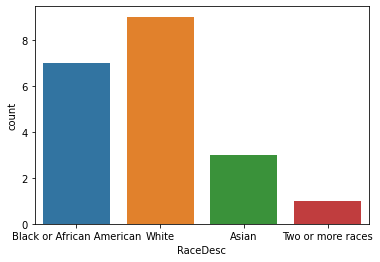

In [33]:
a = data[data['TermReason'] == 'Another position']
sns.countplot(x="RaceDesc", data = a)